# 2. Stabilty Analysis of a Limmit Cycle

In [1]:
import numpy as np
from numpy import pi, exp, sqrt, power
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Derived Pointcare function
def P(r,args):
    w, mu, eps, = arg;
    return sqrt(mu/(1-exp(-4*pi*mu*eps/w)*(1-mu/power(r,2))))

In [3]:
# Hopf Ocssilator 
def Hopf(t,x,arg):
    x1, x2 = x;
    w, mu, eps, = arg;
    return np.array([eps*(mu-(np.power(x1,2)+np.power(x2,2)))*x1+w*x2,
                     eps*(mu-(np.power(x1,2)+np.power(x2,2)))*x2-w*x1])

In [4]:
# Hopf Paramenters
w_val = 50;
mu_val = 1;
eps_val = 1
arg = [w_val,mu_val,eps_val]

In [5]:
# Event Function
def event(t, x, args):
    x1, x2 = x;
    w, mu, eps, = arg;
    return x2

In [30]:
# Simulating

n = 20
A = 2

tmax = 5
steps = 1000
t = np.linspace(0,tmax,steps)

sol = []
x = []

for i in range(20):
    x0 = [A*np.random.rand()*2-1,A*np.random.rand()*2-1]
    x.append(x0)
    sol.append(solve_ivp(Hopf, [0, tmax],x0, args=[arg], t_eval=t,events=event))


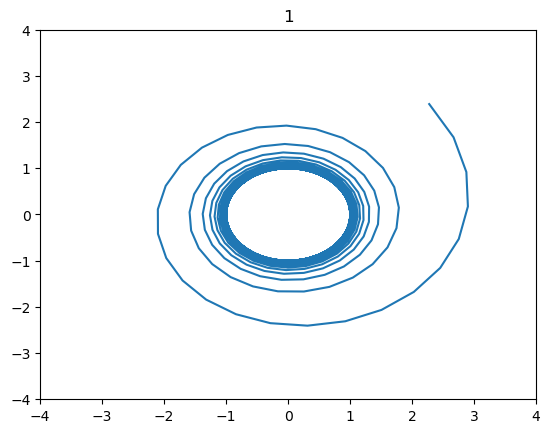

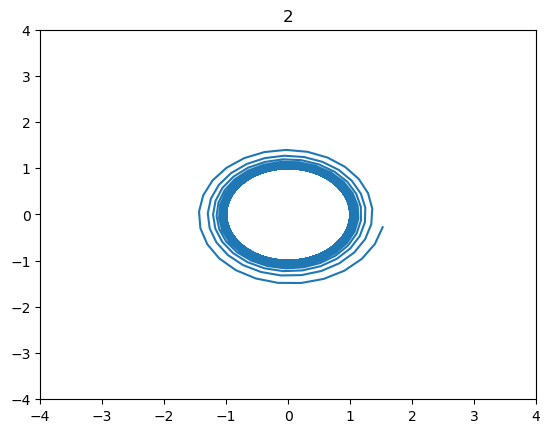

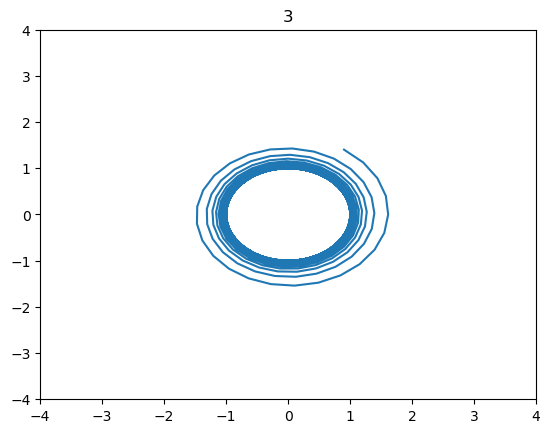

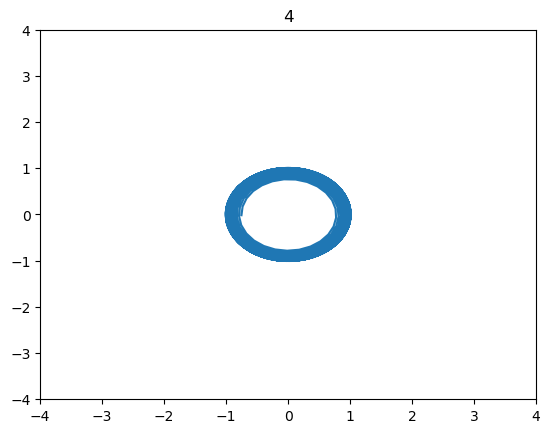

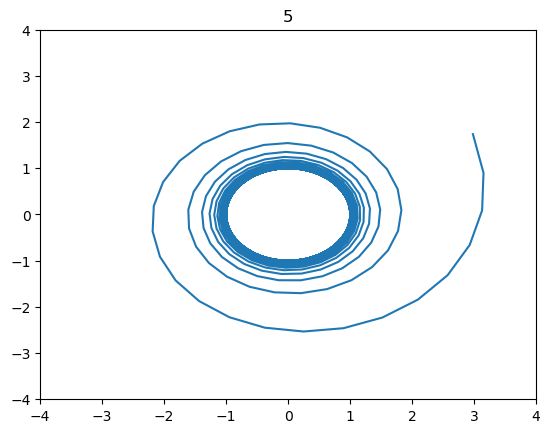

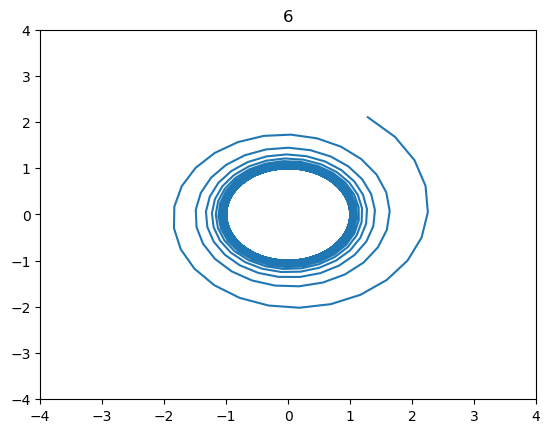

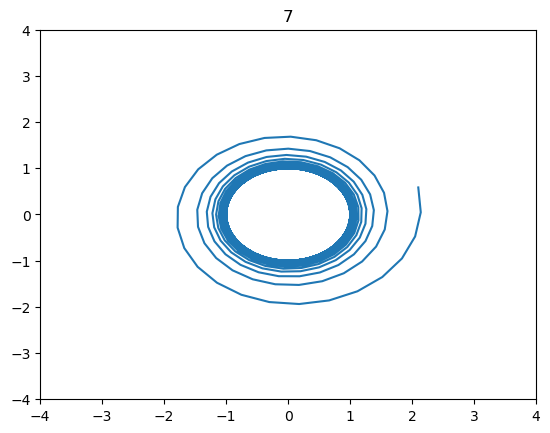

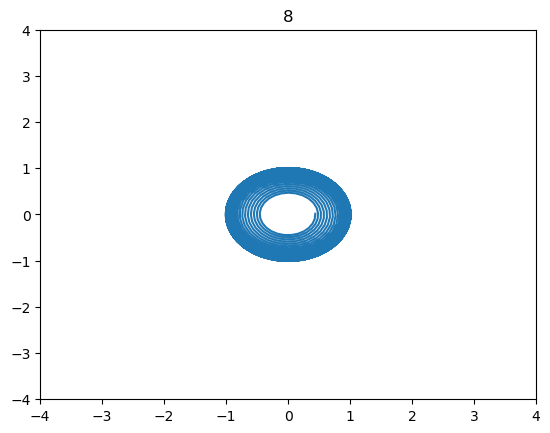

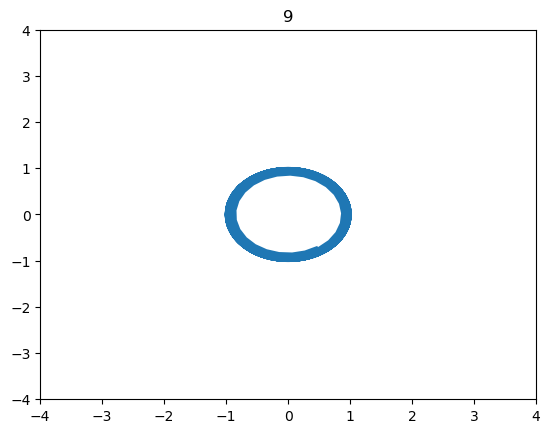

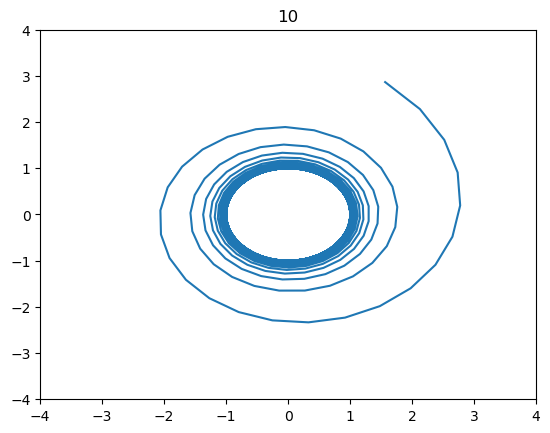

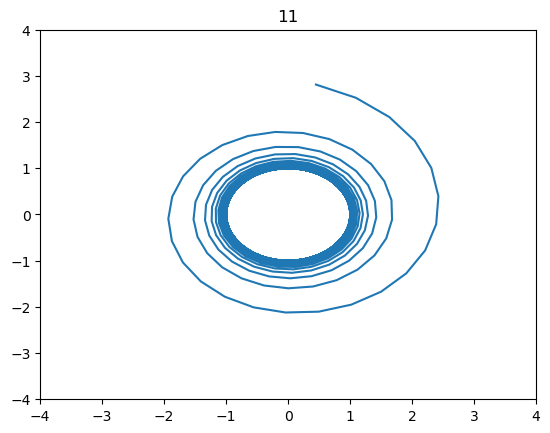

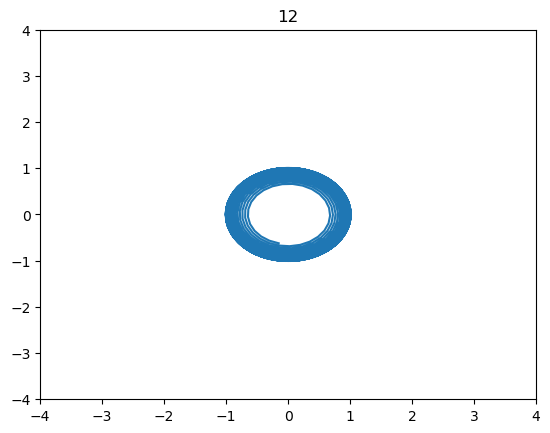

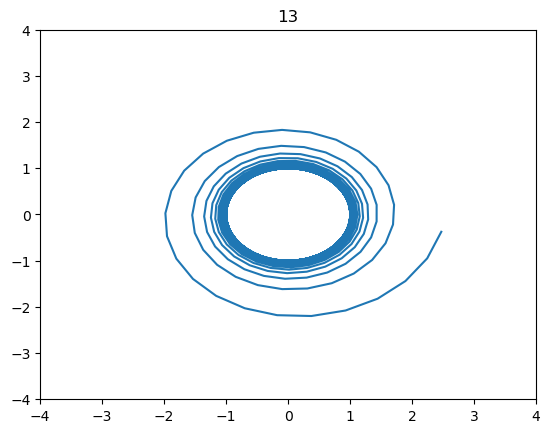

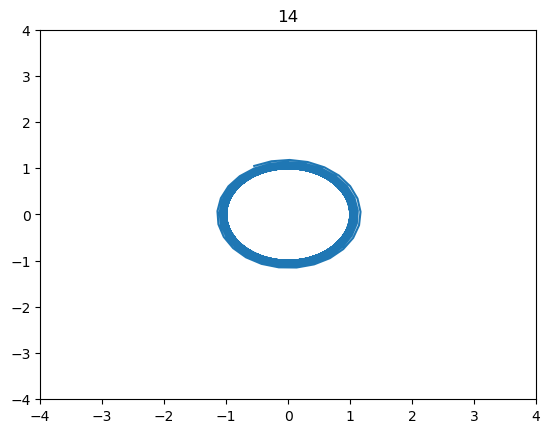

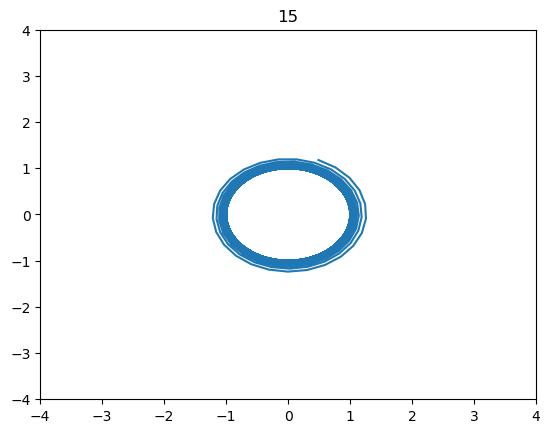

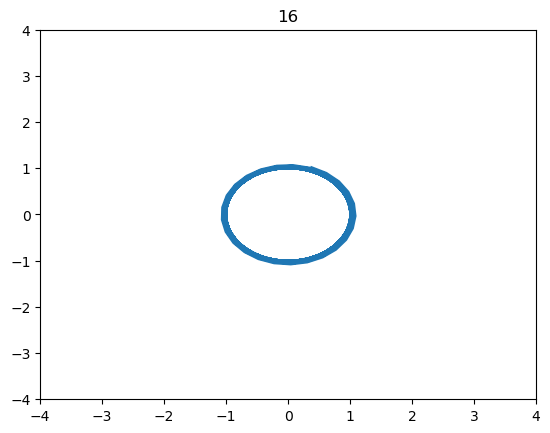

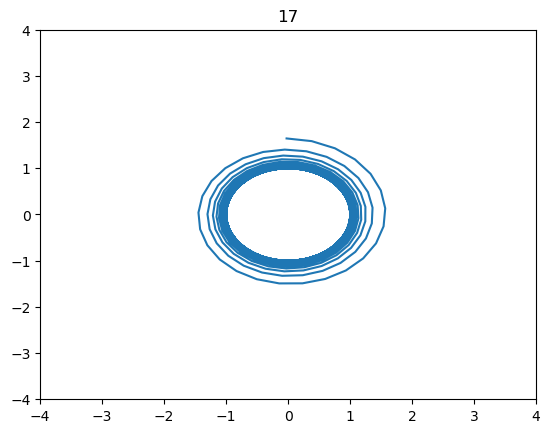

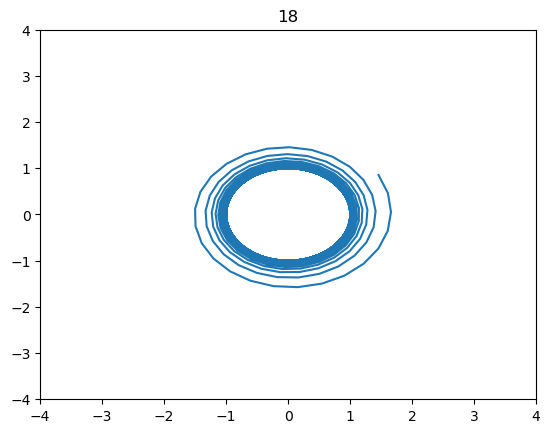

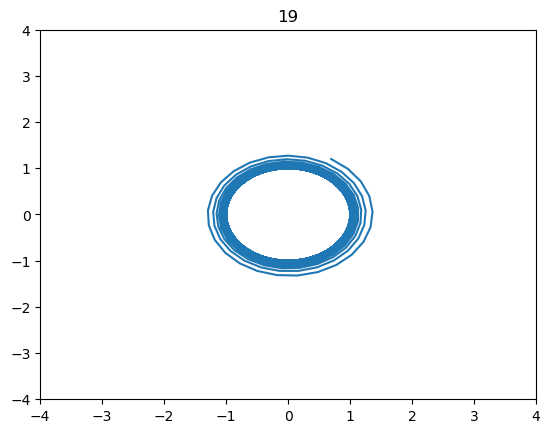

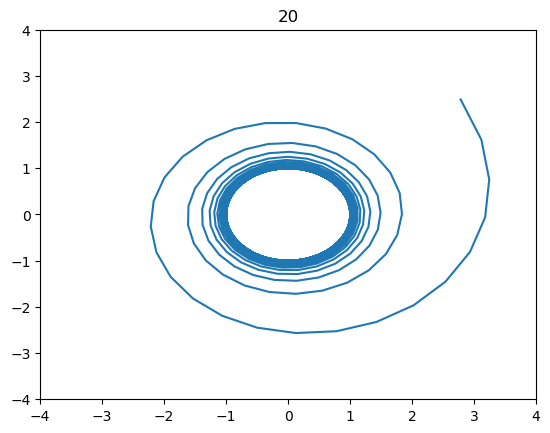

In [32]:
# Plotting Simulation 
for j in range(20):
    xmin = -4
    xmax = 4
    ymin = -4
    ymax = 4

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(sol[j].y[0,:],sol[j].y[1,:])
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    ax.set_title(j+1)


In [10]:
# Solving for the return map
return_map = []
for j in range(20):
    x_inter = sol[j].y_events[0]
    
    r = []
    for i in range(len(x_inter[:,0])):
                   if(x_inter[i,0] > 0):
                       r.append(x_inter[i,0])

    return_map.append([[r[i] for i in range(len(r)-1)],[r[i+1] for i in range(len(r)-1)]])



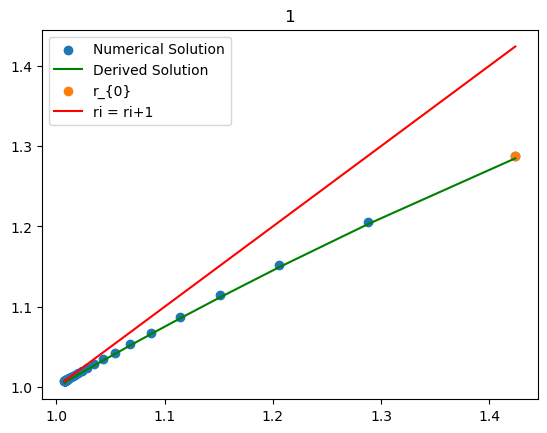

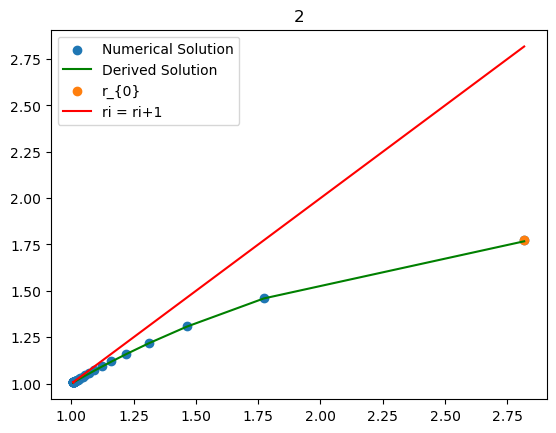

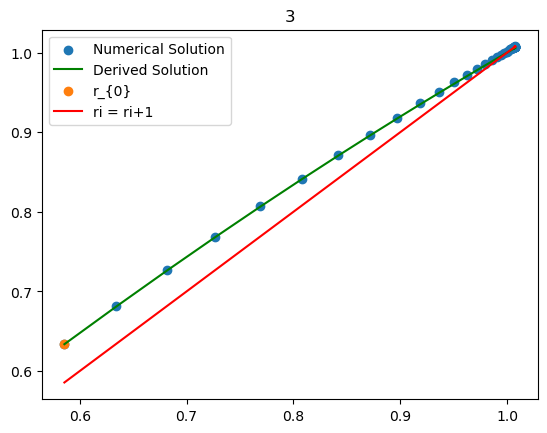

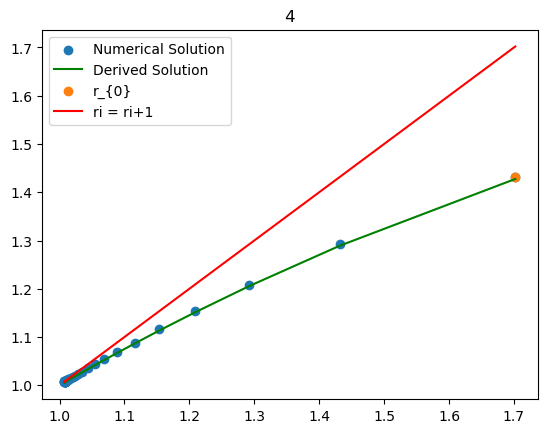

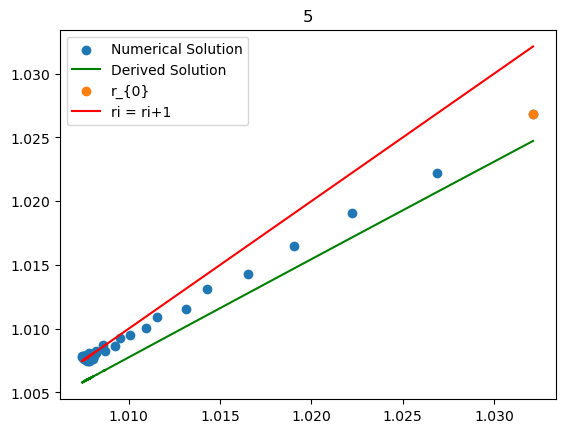

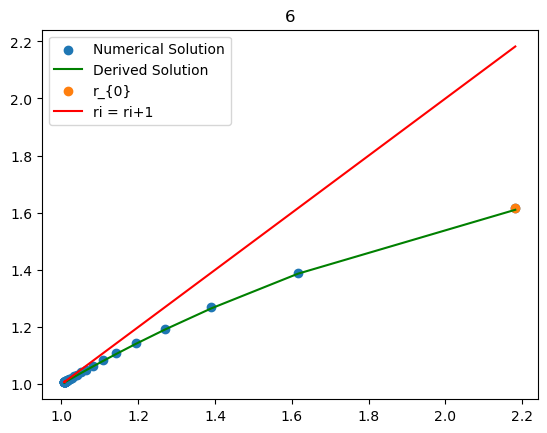

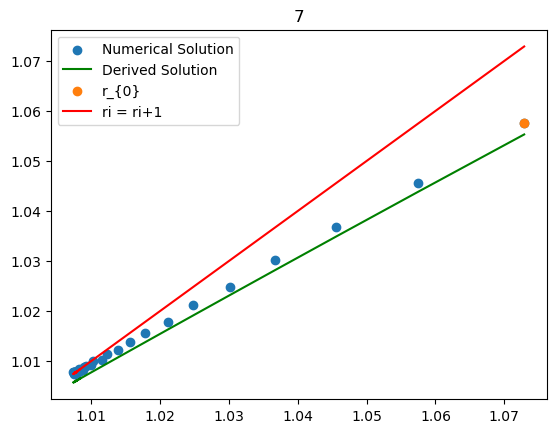

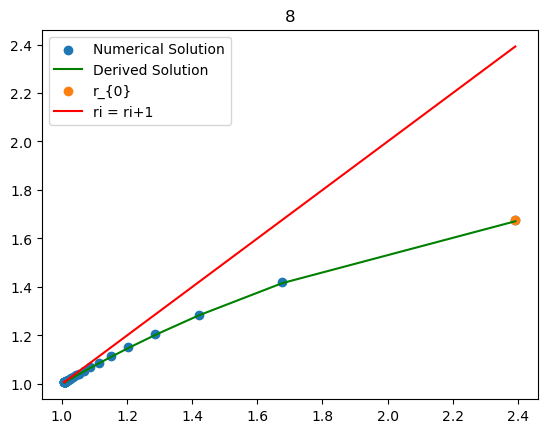

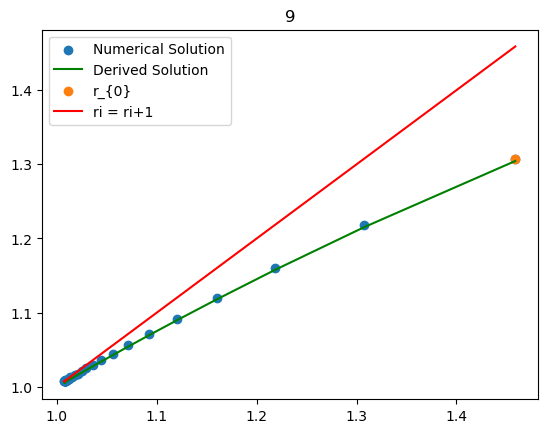

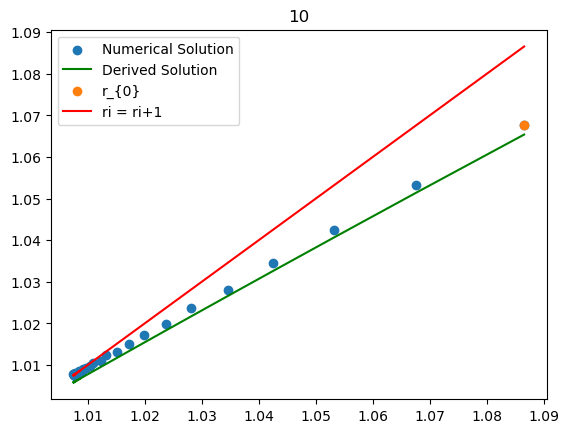

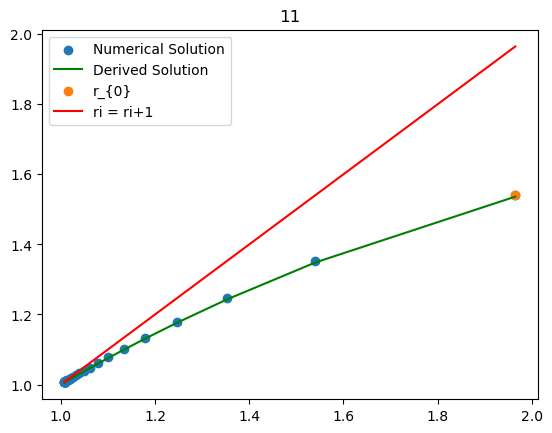

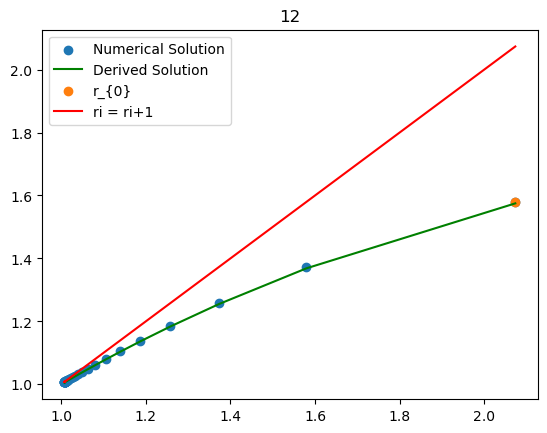

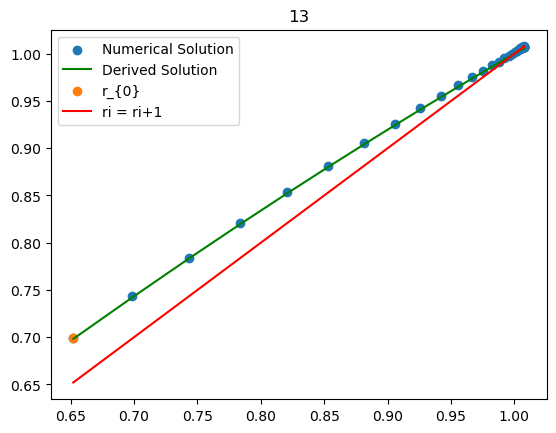

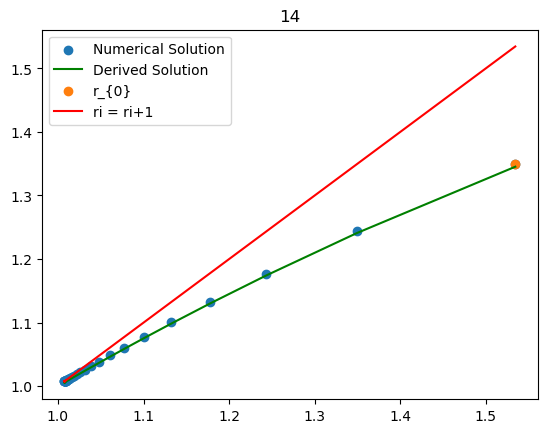

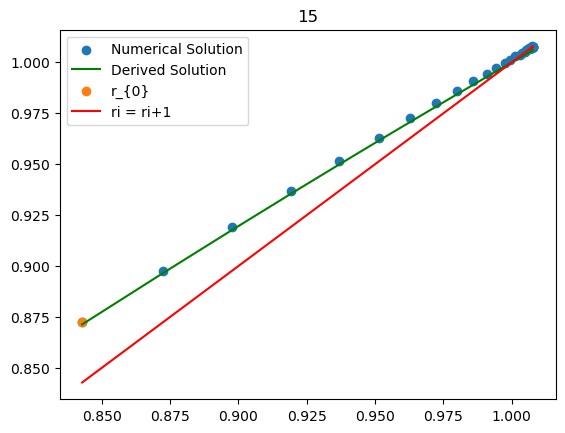

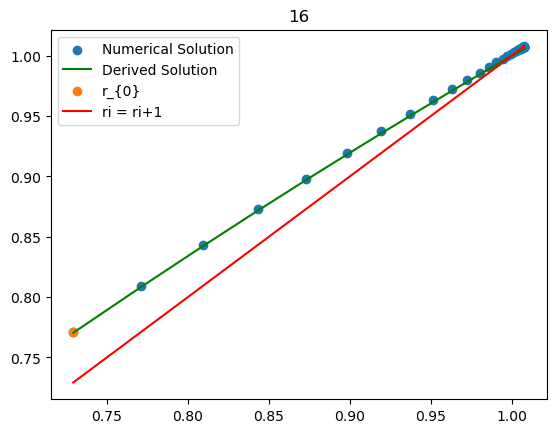

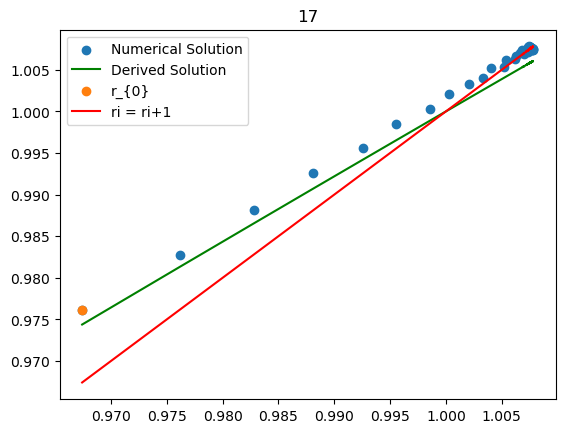

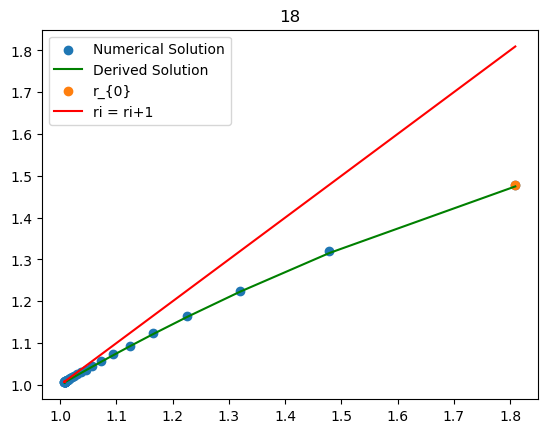

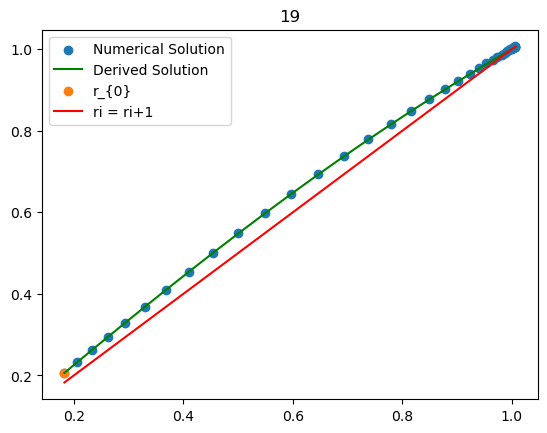

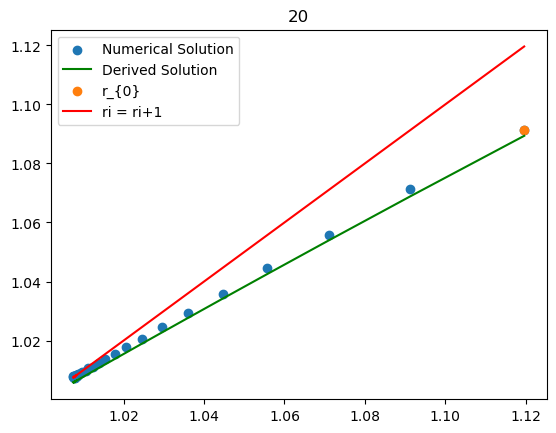

In [33]:
# Plotting 20 Simulations 
for j in range(20):
    xmin = min(return_map[j][0])
    xmax = max(return_map[j][0])
    ymin = min(return_map[j][1])
    ymax = max(return_map[j][1])

    X = return_map[j][0]
    Y = P(X,arg)

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(return_map[j][0],return_map[j][1])
    ax.plot(X,Y,'g')
    ax.scatter(return_map[j][0][0],return_map[j][0][1])
    ax.plot(X,X,'r')
    ax.set_title(j+1)
    ax.legend(['Numerical Solution', 'Derived Solution', r'r_{0}',"ri = ri+1" ])
    # ax2.set_xlim([xmin,xmax])
    # ax2.set_ylim([ymin,ymax])

